In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

In [2]:
#input1
df1 = pd.read_csv('train.csv')
df1

,Channel,Watch time(Minutes),Stream time(minutes),Peak viewers,Average viewers,Followers,Followers gained,Views gained,Partnered,Mature,Language
0,2ZR62O53,6196161750,215250,222720,27716,3246298,1734810,93036735,1,0,English
1,ZJ31SS7Q,6091677300,211845,310998,25610,5310163,1370184,89705964,1,0,English
2,I31VI9RK,5644590915,515280,387315,10976,1767635,1023779,102611607,1,1,Portuguese
3,6GP9WLYR,3970318140,517740,300575,7714,3944850,703986,106546942,1,0,English
4,3DVR0TDD,3671000070,123660,285644,29602,8938903,2068424,78998587,1,0,English
...,...,...,...,...,...,...,...,...,...,...,...
795,M3VVKDII,155187570,57120,19298,2647,179420,132867,4071398,1,0,Italian
796,H4RDC7MS,154982550,87945,7136,1711,245715,122045,3621969,1,1,Portuguese
797,3OR62HLN,154727730,94275,6213,1605,114154,32991,3059244,1,0,Spanish
798,Y7UCJJTF,154595850,85635,8533,1777,120494,28322,3446723,1,0,Spanish


In [3]:
#input2
df2 = pd.read_csv('test.csv')
df2

,Channel,Watch time(Minutes),Stream time(minutes),Peak viewers,Average viewers,Followers,Views gained,Partnered,Mature,Language
0,97R8L3J0,154332060,27105,29983,5864,308815,8255635,0,0,Russian
1,6UV44QFF,154277370,87375,9437,1759,151886,3019137,1,1,French
2,2WKQZUGR,154125945,77475,9460,2106,411346,4832180,1,0,Turkish
3,R4DGVX2D,153988380,83325,11200,1787,272635,4345590,1,0,French
4,P8YSNIOI,153963765,110910,14329,1281,106365,1449834,1,1,English
...,...,...,...,...,...,...,...,...,...,...
195,8Q556ABI,122524635,13560,21359,9104,601927,2162107,1,0,Spanish
196,AXQ2XZ45,122523705,153000,3940,793,213212,4399897,1,0,Korean
197,AP7UE7SZ,122452320,217410,6431,567,109068,3417970,1,0,Korean
198,PNCBWRE4,122311065,104745,10543,1153,547446,3926918,1,0,English


In [41]:
#add one more feature for higher accuracty: Average view-to-Follower ratio
df1['view_follower_ratio'] = df1['Average viewers'] / df1['Followers']
df2['view_follower_ratio'] = df2['Average viewers'] / df2['Followers']

### exploration of the data

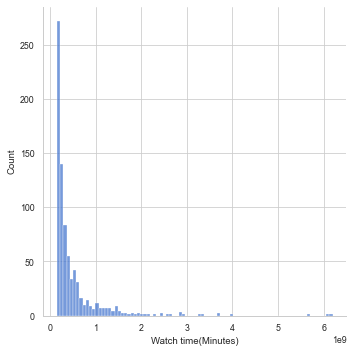

In [42]:
sns.displot(df1['Watch time(Minutes)'])

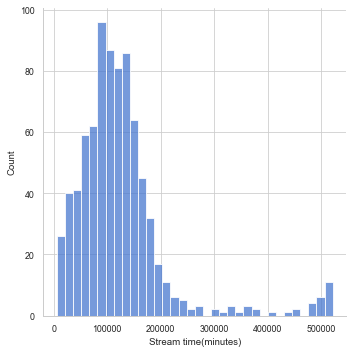

In [43]:
sns.displot(df1['Stream time(minutes)'])

In [44]:
# see whether they follow 

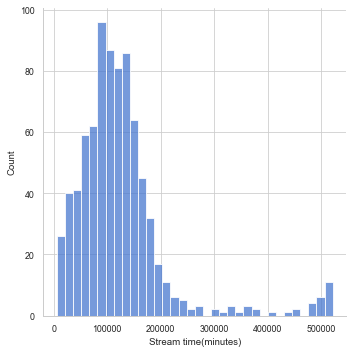

In [45]:
sns.displot(df1['Stream time(minutes)'])

In [46]:
#pearson correlation coefficient
corr = df1.corr(method = 'pearson')
print(corr)

                      Watch time(Minutes)  Stream time(minutes)  Peak viewers  \
Watch time(Minutes)              1.000000              0.142595      0.571757   
Stream time(minutes)             0.142595              1.000000     -0.129196   
Peak viewers                     0.571757             -0.129196      1.000000   
Average viewers                  0.467120             -0.261245      0.675667   
Followers                        0.609992             -0.099255      0.521205   
Followers gained                 0.507129             -0.167166      0.463095   
Views gained                     0.522255              0.064237      0.285932   
Partnered                        0.012512             -0.066584      0.035312   
Mature                          -0.033325              0.048541     -0.081743   
view_follower_ratio              0.041748             -0.192746      0.294327   

                      Average viewers  Followers  Followers gained  \
Watch time(Minutes)          0.467120 

<AxesSubplot:>

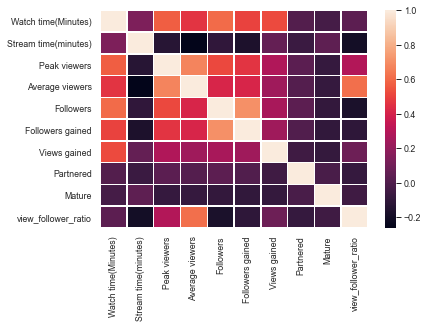

In [47]:
#heatmap 
import seaborn as sns
sns.set(context = 'paper', style = 'whitegrid', palette = 'muted', font_scale = 1, color_codes = True, rc = None)
sns.heatmap(corr, linewidths = .5)

<AxesSubplot:xlabel='Followers gained'>

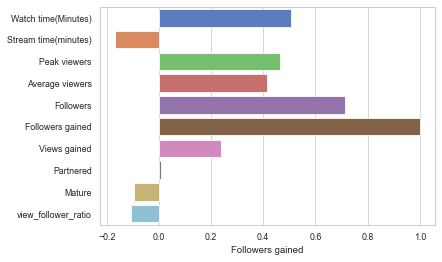

In [48]:
#to observe the correlation betweem 'Followers gained' and other variables
sns.barplot(x = corr['Followers gained'], y = corr.columns)

### data preprocessing

In [49]:
#check the existence of the null values in the data
df1.isnull().sum()

Channel                 0
Watch time(Minutes)     0
Stream time(minutes)    0
Peak viewers            0
Average viewers         0
Followers               0
Followers gained        0
Views gained            0
Partnered               0
Mature                  0
Language                0
view_follower_ratio     0
dtype: int64

In [50]:
#checking dtypes of each column
print(df1.dtypes)
print(df2.dtypes)

Channel                  object
Watch time(Minutes)       int64
Stream time(minutes)      int64
Peak viewers              int64
Average viewers           int64
Followers                 int64
Followers gained          int64
Views gained              int64
Partnered                 int64
Mature                    int64
Language                 object
view_follower_ratio     float64
dtype: object
Channel                  object
Watch time(Minutes)       int64
Stream time(minutes)      int64
Peak viewers              int64
Average viewers           int64
Followers                 int64
Views gained              int64
Partnered                 int64
Mature                    int64
Language                 object
view_follower_ratio     float64
dtype: object


In [51]:
df1.describe().T #stats of the test data

,count,mean,std,min,25%,50%,75%,max
Watch time(Minutes),800.0,4.888771e+08,5.940109e+08,1.545242e+08,2.004784e+08,2.899965e+08,5.276095e+08,6.196162e+09
Stream time(minutes),800.0,1.245265e+05,8.762512e+04,6.195000e+03,7.658625e+04,1.108575e+05,1.476638e+05,5.214450e+05
Peak viewers,800.0,4.230734e+04,6.569140e+04,1.182000e+03,1.080075e+04,1.960700e+04,4.372700e+04,6.393750e+05
Average viewers,800.0,5.402686e+03,9.180192e+03,3.130000e+02,1.727750e+03,2.829500e+03,5.465500e+03,1.476430e+05
Followers,800.0,6.449188e+05,8.733633e+05,3.660000e+03,1.988715e+05,3.660885e+05,7.319040e+05,8.938903e+06
Followers gained,800.0,2.299286e+05,3.704139e+05,-1.577200e+04,4.940325e+04,1.142085e+05,2.533272e+05,3.966525e+06
Views gained,800.0,1.335486e+07,2.732344e+07,1.757880e+05,4.889789e+06,7.630136e+06,1.378407e+07,6.701375e+08
Partnered,800.0,9.862500e-01,1.165243e-01,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
Mature,800.0,2.175000e-01,4.128035e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view_follower_ratio,800.0,1.218502e-02,1.634936e-02,3.968636e-04,4.930182e-03,8.497441e-03,1.394530e-02,2.330534e-01


In [52]:
# ['Watch time(Minutes)', 'Stream time(minutes)', 'Peak viewers', 'Average viewers', 'Followers', 'no_view_follower_ratio'] should be X inputs
X = df1[['Watch time(Minutes)', 'Stream time(minutes)', 'Peak viewers',
       'Average viewers', 'Followers', 'view_follower_ratio']]
y = df1['Followers gained']

In [13]:
print(X.shape)
print(y.shape)

(800, 6)
(800,)


In [14]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

#define X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state =0)

In [15]:
#preprocessing step
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [16]:
X_train.shape

(640, 6)

In [17]:
#df2-related preprocessing step 
ex_input = df2[['Watch time(Minutes)', 'Stream time(minutes)', 'Peak viewers',
       'Average viewers', 'Followers', 'view_follower_ratio']]
#ex_input = ex_input.to_numpy()
scaler.fit(ex_input)
ex_input = scaler.transform(ex_input)

In [18]:
ex_input.shape

(200, 6)

### 1) linear regression

In [58]:
#import libraries related to ilnear regression model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

#### train the model

In [59]:
lr =   LinearRegression().fit(X_train, y_train)
pred = lr.predict(X_test)

print('r2 score: ', str(r2_score(y_test, pred)))
print('RMSE: ', str(np.sqrt(mean_squared_error(y_test, pred)))) # RMSE = root mean squared error

r2 score:  0.5605800364079346
RMSE:  287891.47688308347


#### accuracy of the linear regression model

In [60]:
print("accuracy of the train score: {:.3f}".format(lr.score(X_train, y_train)))
print("accuracy of the test score: {:.3f}".format(lr.score(X_test, y_test)))

accuracy of the train score: 0.546
accuracy of the test score: 0.561


### 2) ADAboost (to boost the performance of linear regression) 

In [61]:
from sklearn.ensemble import AdaBoostRegressor

ada_clf = AdaBoostRegressor(random_state =0, n_estimators = 100)

#### train model 

In [62]:
ada_clf.fit(X_train, y_train)
y_pred_ada = ada_clf.predict(X_test)

#### accuracy of the adaboost model

In [63]:
print("accuracy of the train score: {:.3f}".format(ada_clf.score(X_train, y_train)))
print("accuracy of the test score: {:.3f}".format(ada_clf.score(X_test, y_test)))

accuracy of the train score: 0.733
accuracy of the test score: 0.528


### 3) Random  Forest

In [64]:
#import libraries required for SVM
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(n_estimators = 500, max_leaf_nodes = 16, n_jobs = -1) 

#### train model

In [65]:
rnd_clf = rnd_clf.fit(X_train, y_train)
y_pred_rf = rnd_clf.predict(X_test)

In [66]:
ex_pred_rf = rnd_clf.predict(ex_input)
ex_pred_rf

array([ 412101,  143569,  143569,  143569,   35986,  370358,  143569,
        143569,  143569,  689957,  689957,  121422,  143569,   36103,
        450146,   35986,  875678,   10214,   36103,  108832,   36988,
        875678,  108832,  108832,   13471, 1061265,  167704,   35986,
          1328,   11998,  486410,   29549,  689957,   37839,   69465,
         10214,   29434,   10214,   36103,   13471,   38195,  875678,
         87860,   29434,  124038,   10214,   11998,   35986,  238257,
        244295,  175130,   11998,  826433,  750480,   36103,  216021,
         29549,  216021,   13471,  241309,  547018,   29549,   29549,
         35986,  566210,   11998,  104382,   26768,   31088,   29549,
         35986,  181232,   36988,  672978,  280538,   19448,  137229,
         37839,   57448,  486410,  315910,   41176,  137229,   54112,
         90213,   60041,   11998,  104382,   11998,   13471,    1328,
         30588,  331906,  337821,   87400,   11998,  331906,  331906,
        758797,   36

#### accuracy of the random forest model 

In [67]:
print("accuracy of the train score: {:.3f}".format(rnd_clf.score(X_train, y_train)))
print("accuracy of the test score: {:.3f}".format(rnd_clf.score(X_test, y_test)))

accuracy of the train score: 0.805
accuracy of the test score: 0.000


In [68]:
#confusion matrix 
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits = 5, shuffle = True, random_state = 0)

from sklearn.ensemble import RandomForestRegressor

max_depth_list = []
model = RandomForestRegressor(n_estimators = 100, n_jobs= -1, random_state = 0) 
%time score = cross_val_score (model, X_train, y_train, cv = k_fold) 
score = score.mean()
#the closer to 0, the better
print("score = {0:.5f}".format(score))


CPU times: user 628 ms, sys: 152 ms, total: 779 ms
Wall time: 2.51 s
score = 0.38509


Random forest model seems to be the most appropriate, showing the highest accuracy. 

#### finding the best features 

In [69]:
X_features = X.columns.tolist()
X_features

['Watch time(Minutes)',
 'Stream time(minutes)',
 'Peak viewers',
 'Average viewers',
 'Followers',
 'view_follower_ratio']

### see the feature importances

In [70]:
for name, score in zip(X_features, rnd_clf.feature_importances_):
    print(name, score)

Watch time(Minutes) 0.17750167429532732
Stream time(minutes) 0.16807051222769112
Peak viewers 0.16963010454438482
Average viewers 0.15710006986279978
Followers 0.16460996649834497
view_follower_ratio 0.16308767257145212


feature importances:
eak viewers > Stream time(minutes) > Watch time(Minutes) > Followers  > view_follower_ratio > Average viewers 

[Text(0.5, 1.0, 'test data set')]

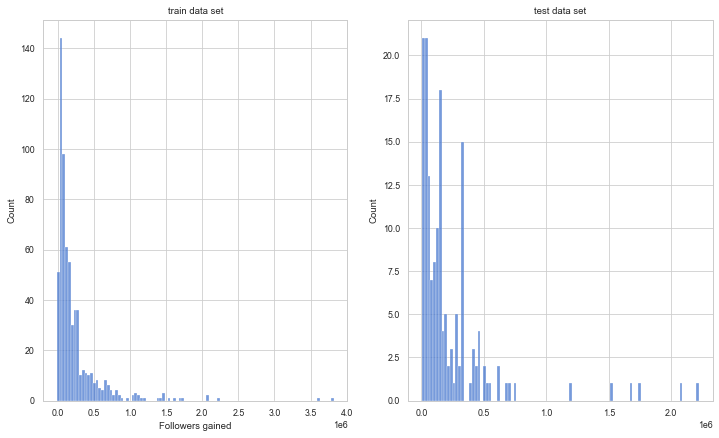

In [71]:
#visualization of the predicted data
import matplotlib.pyplot as plt
fig, (ax1, ax2) = plt.subplots(ncols = 2)
fig.set_size_inches(12,7)
sns.histplot(y_train, ax = ax1, bins = 100) 
ax1.set(title = 'train data set')
sns.histplot(y_pred_rf, ax = ax2, bins = 100) 
ax2.set(title = 'test data set')

In [72]:
ex_input

array([[ 1.84183462, -1.05153979,  0.71109194,  1.0073879 ,  0.14161934,
         0.08236443],
       [ 1.83614388, -0.23235142, -0.34096889, -0.15111475, -0.43986076,
        -0.07065135],
       [ 1.82038743, -0.36691198, -0.33979117, -0.05318529,  0.52153469,
        -0.20411821],
       ...,
       [-1.47539574,  1.53508111, -0.49489155, -0.48751795, -0.59851732,
        -0.20249019],
       [-1.49009396,  0.00374119, -0.284336  , -0.32213852,  1.02583562,
        -0.2663691 ],
       [-1.50239476, -0.07189815, -0.11817532, -0.30746322, -0.34104964,
        -0.17047057]])

### Submit

In [74]:
#check prediction
ex_pred = rnd_clf.predict(ex_input)
channel = df2['Channel'].tolist()

df_content = {'Channel': channel, 'Followers gained': ex_pred}
final_df = pd.DataFrame(df_content)
final_df

,Channel,Followers gained
0,97R8L3J0,412101
1,6UV44QFF,143569
2,2WKQZUGR,143569
3,R4DGVX2D,143569
4,P8YSNIOI,35986
...,...,...
195,8Q556ABI,23303
196,AXQ2XZ45,23303
197,AP7UE7SZ,23303
198,PNCBWRE4,23303


In [77]:
final_df.columns

Index(['Channel', 'Followers gained'], dtype='object')

In [82]:
#export "final_df" as excel file
final_df.to_excel('final_pred_LEE,Jooran.xlsx', index=False, header = 1)

In [36]:
#final submission file should be in a similar format as below:
final_ex = pd.read_csv('sample submission.csv')
final_ex

,Channel,Followers gained
0,97R8L3J0,0
1,6UV44QFF,0
2,2WKQZUGR,0
3,R4DGVX2D,0
4,P8YSNIOI,0
...,...,...
195,8Q556ABI,0
196,AXQ2XZ45,0
197,AP7UE7SZ,0
198,PNCBWRE4,0
